In [8]:
import pandas as pd
import numpy as np

In [3]:
##Pandas 29: Melakukan Random Sampling pada Data Frame

In [4]:
#mempersiapkan data frame
d = {'col_1':[1, 2, 3, 4, 5], #nilai-nilai di kolom 1
     'col_2':[10, 20, 30, 40, 50]} #nilai-nilai di kolom 2
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [5]:
#Random sampling without replacement
df.sample(n=4, replace=False, random_state=0)#3 parameter pada df.sample, n untuk banyak index, replace=False untuk without replacement (data yang sudah disampling dari population tidak disampling ulang), random_state berkorelasi dengan nilai random state number dengan angka integer berapapun menjamin setiap eksperimen bisa direplikasi/dilakukan ulang dengan hasil yang sama

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [6]:
#Random sampling with replacement
df.sample(n=4, replace=True, random_state=0)#3 parameter pada df.sample, n untuk banyak index, replace=True untuk with replacement (data yang sudah disampling dari population disampling ulang, index sama dapat dimunculkan berkali-kali), random_state berkorelasi dengan nilai random state number dengan angka integer berapapun menjamin setiap eksperimen bisa direplikasi/dilakukan ulang dengan hasil yang sama

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


In [7]:
##Pandas 30: Akses Nilai Variabel pada query()

In [9]:
#mempersiapkan Data Frame Sample
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)),  #setiap sel atau data yang ditampung Data Frame berupa data random integer 1 sampai 20
                  columns=cols)
df

,A,B,C,D,E
0,5,19,13,5,4
1,10,19,3,3,9
2,6,16,10,2,10
3,11,11,13,4,6
4,18,12,7,12,7


In [10]:
df.query('A > 10')#method query() digunakan untuk menyeleksi baris. df.query() menyeleksi baris-baris pada kolom A yang lebih daripada 10

,A,B,C,D,E
3,11,11,13,4,6
4,18,12,7,12,7


In [11]:
rerata = df['A'].mean()#nilai rerata adalah nilai mean dari kolom A yang variabel ini selanjutnya digunakan sebagai acuan df.query
rerata

10.0

In [12]:
df.query('A > @rerata')#mencantum @ sebelum variabel yang nilainya menjadi acuan df.query dari kolom tertentu

,A,B,C,D,E
3,11,11,13,4,6
4,18,12,7,12,7


In [13]:
##Pandas 31: Mengenal Tipe Data Ordinal pada Pandas

In [14]:
#Tipe data ordinal dalam statistik termasuk dalam tipe data kategori yang terbagi jadi 2: nominal dan ordinal. Perbedaan: nominal memiliki sifat murni sebagai label, ordinal memiliki tingkatan/urutan yang memilki makna
#Mempersiapkan Data Frame
d = {'pelanggan':[11, 12, 13, 14], 
     'kepuasan':['baik', 'cukup', 'buruk', 'cukup']}

df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [15]:
from pandas.api.types import CategoricalDtype#modul CaterogicaclDtype untuk mengajarkan komputer makna dari tipe data ordinal yang ada dan menspesifikasikannya

tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'], 
                                    ordered=True)#Objek ini ditampung ke variabel tingkat kepuasan

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)#nilai kepuasan akan dispesifikasikan dengan tipe data baru dengan cara astype()
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [16]:
df = df.sort_values('kepuasan', ascending=True)#mengurutkan kepuasan secara ascending hasil sesuai urutan ordinal
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [17]:
df[df['kepuasan'] >= 'cukup']#menampilkan data yang kepuasannya lebih dari baik atau sama dengan cukup

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


In [18]:
##Pandas 32: Plotting dari Suatu Pandas Data Frame

In [19]:
#melakukan plotting visualisasi data tanpa import modul matplotlib
#mempersiapkan data frame
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df.head()

,A,B,C,D,E
0,16,17,7,7,6
1,7,15,17,19,4
2,4,16,18,5,10
3,17,17,12,16,11
4,10,7,7,7,5


In [20]:
#model visualisasi line plot
df.head()#melihat isi data frame

,A,B,C,D,E
0,16,17,7,7,6
1,7,15,17,19,4
2,4,16,18,5,10
3,17,17,12,16,11
4,10,7,7,7,5


<AxesSubplot:>

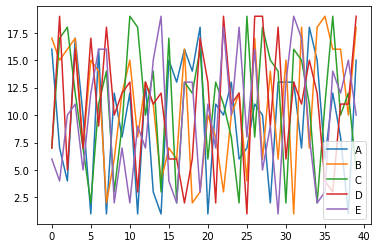

In [21]:
df.plot(kind='line')#melakukan visualisasi data df sebagai line plot. Parameter (kind='line'), memplotting untuk keseluruhan kolom, setiap baris merepresentasikan kolom dengan lima buah baris yang saling bertumpuk. Index baris muncul sebagai sumbu X, nilai yang tertampung pada sel data frame sebagai sumbu y, warna garis merupakan kolom

<AxesSubplot:>

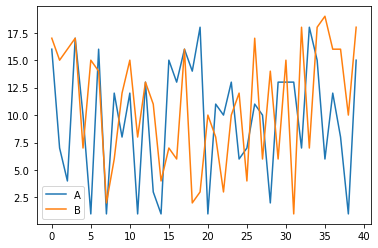

In [22]:
df[['A', 'B']].plot(kind='line')#melakukan plotting pada kolom-kolom tertentu ke dalam suatu list

In [23]:
#model visualisasi data bar plot
df.head()

,A,B,C,D,E
0,16,17,7,7,6
1,7,15,17,19,4
2,4,16,18,5,10
3,17,17,12,16,11
4,10,7,7,7,5


<AxesSubplot:>

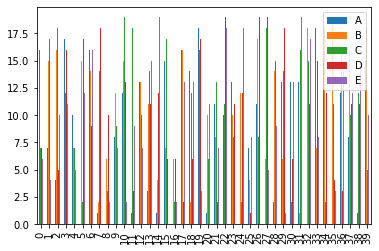

In [24]:
df.plot(kind='bar')#melakukan visualisasi data dalam bentuk bar plot. Parameter (kind='bar'), X axis merepresentasikan index baris, Y axis nilai yang ditampung di setiap sel, warna garis merupakan kolom

<AxesSubplot:>

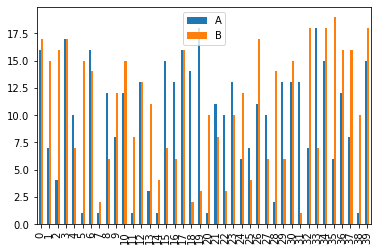

In [25]:
df[['A', 'B']].plot(kind='bar')#menfokuskan pada 2 kolom (A dan B), sumbu X merepresentasikan 40 baris

<AxesSubplot:>

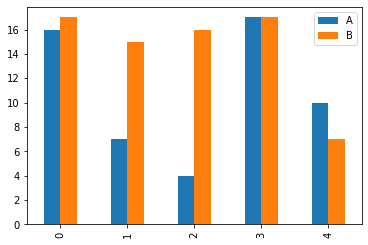

In [26]:
df[['A', 'B']].head().plot(kind='bar')#menampilkan data dari 5 baris pertama saja

<AxesSubplot:>

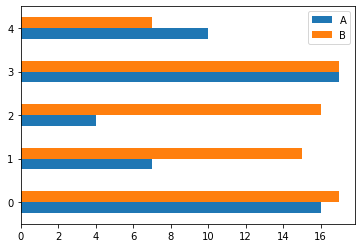

In [27]:
df[['A', 'B']].head().plot(kind='barh')#merepresentasikan bar plot secara horizontal

In [28]:
#model visualisasi data area plot
df.head()

,A,B,C,D,E
0,16,17,7,7,6
1,7,15,17,19,4
2,4,16,18,5,10
3,17,17,12,16,11
4,10,7,7,7,5


<AxesSubplot:>

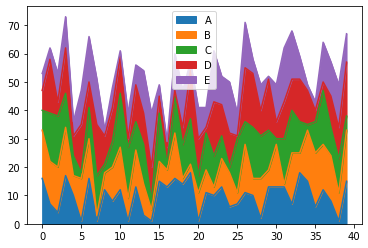

In [29]:
df.plot(kind='area')#mengvisualisasikan dengan model area plot, parameter (kind='area'),mirip dengan line plot namun nilai-nilai bertumpuk lalu memperoleh nilai kumulatif pada sumbu y dari sel-sel

<AxesSubplot:>

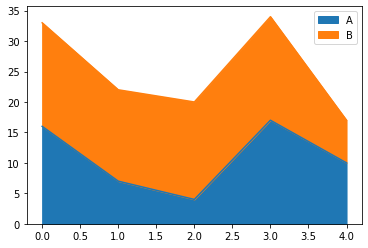

In [30]:
df[['A', 'B']].head().plot(kind='area')#menfokuskan pada kolom A dan B

In [31]:
#model visualisasi data box plot
df.head()

,A,B,C,D,E
0,16,17,7,7,6
1,7,15,17,19,4
2,4,16,18,5,10
3,17,17,12,16,11
4,10,7,7,7,5


<AxesSubplot:>

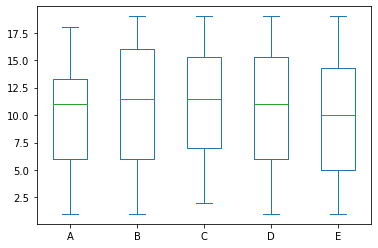

In [32]:
df.plot(kind='box')#mengvisualisasikan dengan model box plot, parameter (kind='box'), sumbu x merepresentasikan kolom, sumbu y menampilkan rentang nilai pada data frame

In [33]:
#model visualisasi data histogram
df.head()

,A,B,C,D,E
0,16,17,7,7,6
1,7,15,17,19,4
2,4,16,18,5,10
3,17,17,12,16,11
4,10,7,7,7,5


<AxesSubplot:ylabel='Frequency'>

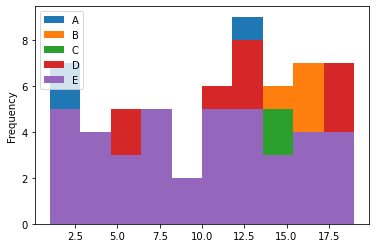

In [34]:
df.plot(kind='hist')#mengvisualisasikan dengan model histogram, parameter (kind='hist'), warna merepresentasi kolomnya, sumbu y frekuensi/jumlah, sumbu x nilai tengah dari yang tertampung pada data frame

<AxesSubplot:ylabel='Frequency'>

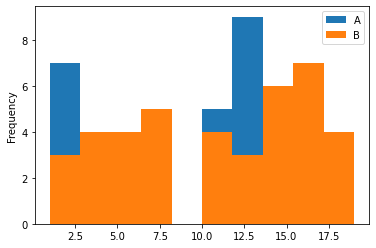

In [35]:
df[['A', 'B']].plot(kind='hist')#fokus pada kolom A dan B

In [36]:
#model visualisasi data Kernel Density Estimation (KDE)
df.head()

,A,B,C,D,E
0,16,17,7,7,6
1,7,15,17,19,4
2,4,16,18,5,10
3,17,17,12,16,11
4,10,7,7,7,5


<AxesSubplot:ylabel='Density'>

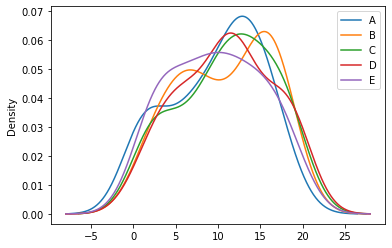

In [37]:
df.plot(kind='kde')#mengvisualisasikan dengan model Kernel Density Estimation (KDE), parameter (kind='kde'),

In [38]:
#model visualisasi data scatter plot
df.head()

,A,B,C,D,E
0,16,17,7,7,6
1,7,15,17,19,4
2,4,16,18,5,10
3,17,17,12,16,11
4,10,7,7,7,5


<AxesSubplot:xlabel='A', ylabel='B'>

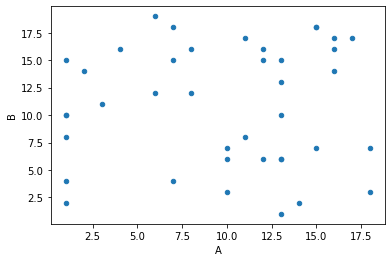

In [39]:
df.plot(x='A', y='B', kind='scatter')#mengvisualisasikan dengan model scatter plot, parameter (kind='scatter'), scatter plot cocok untuk melihat korelasi antar variabel atau dua kolom dalam satu data frame, harus menspesifikasikan 2 kolom mana saja yang ingin diperhatikan